In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Descriptive Statistics

In [7]:
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [8]:
data.describe(include='object').T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

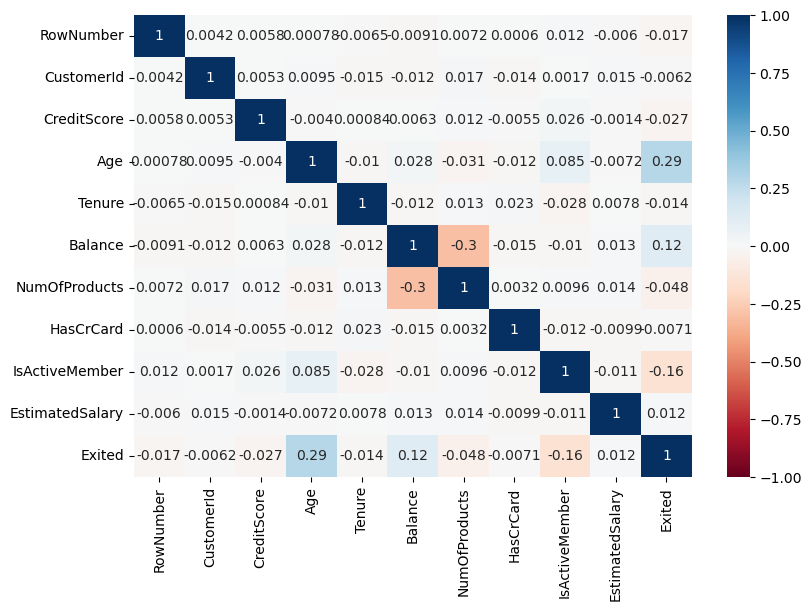

In [9]:
# Explore the correlation among numerical columns
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(numeric_only=True),vmin=-1,annot=True,cmap='RdBu')
plt.show()

## Univariate Analysis

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
num_cols = ['CreditScore','Age', 'Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited','Tenure']

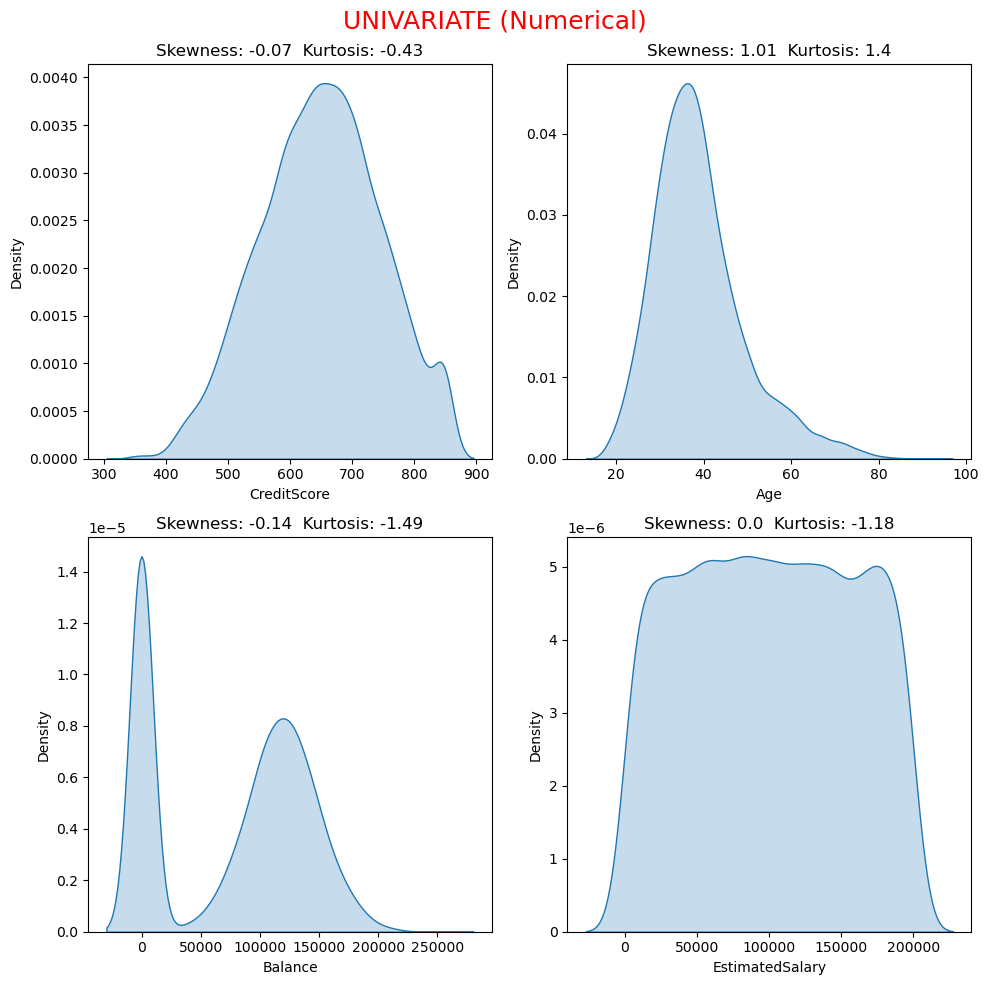

In [13]:
# Num Columns

# Explore the numrical columns

t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    s,k = data[i].skew(),data[i].kurt()
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)}  Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

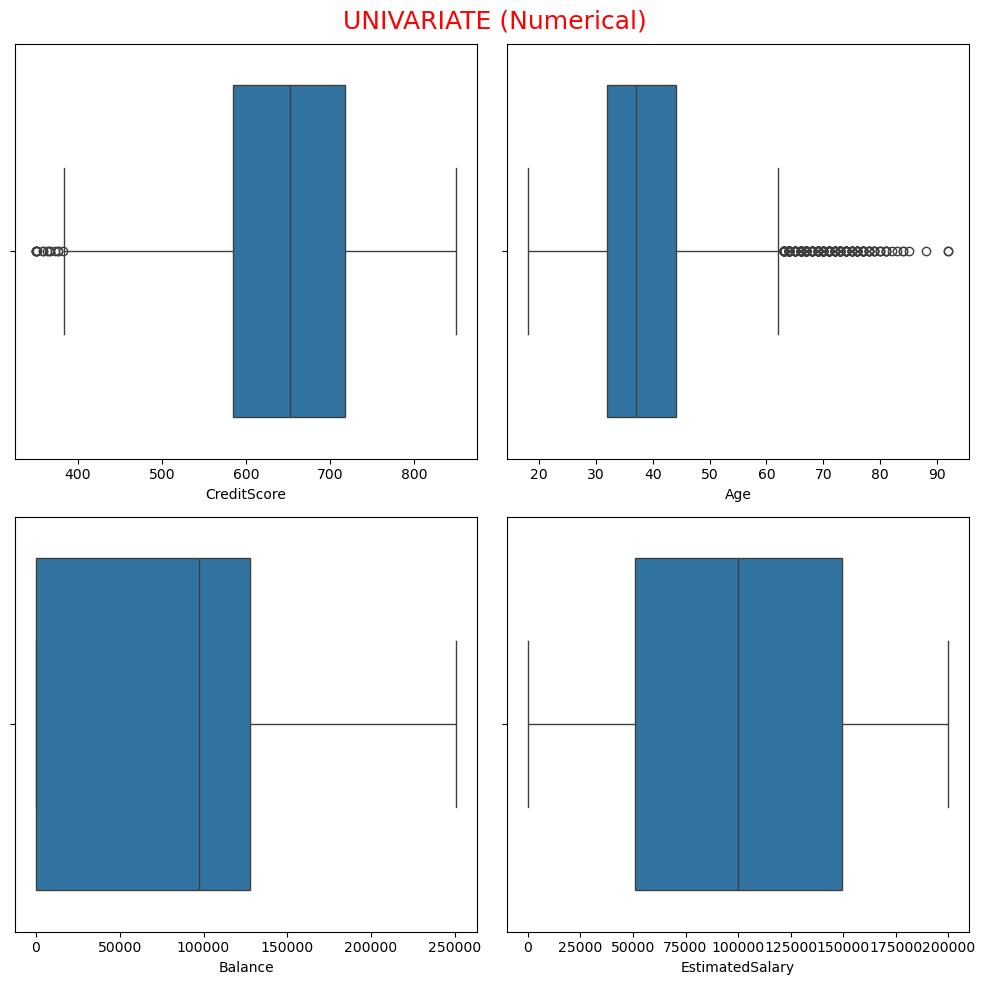

In [14]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

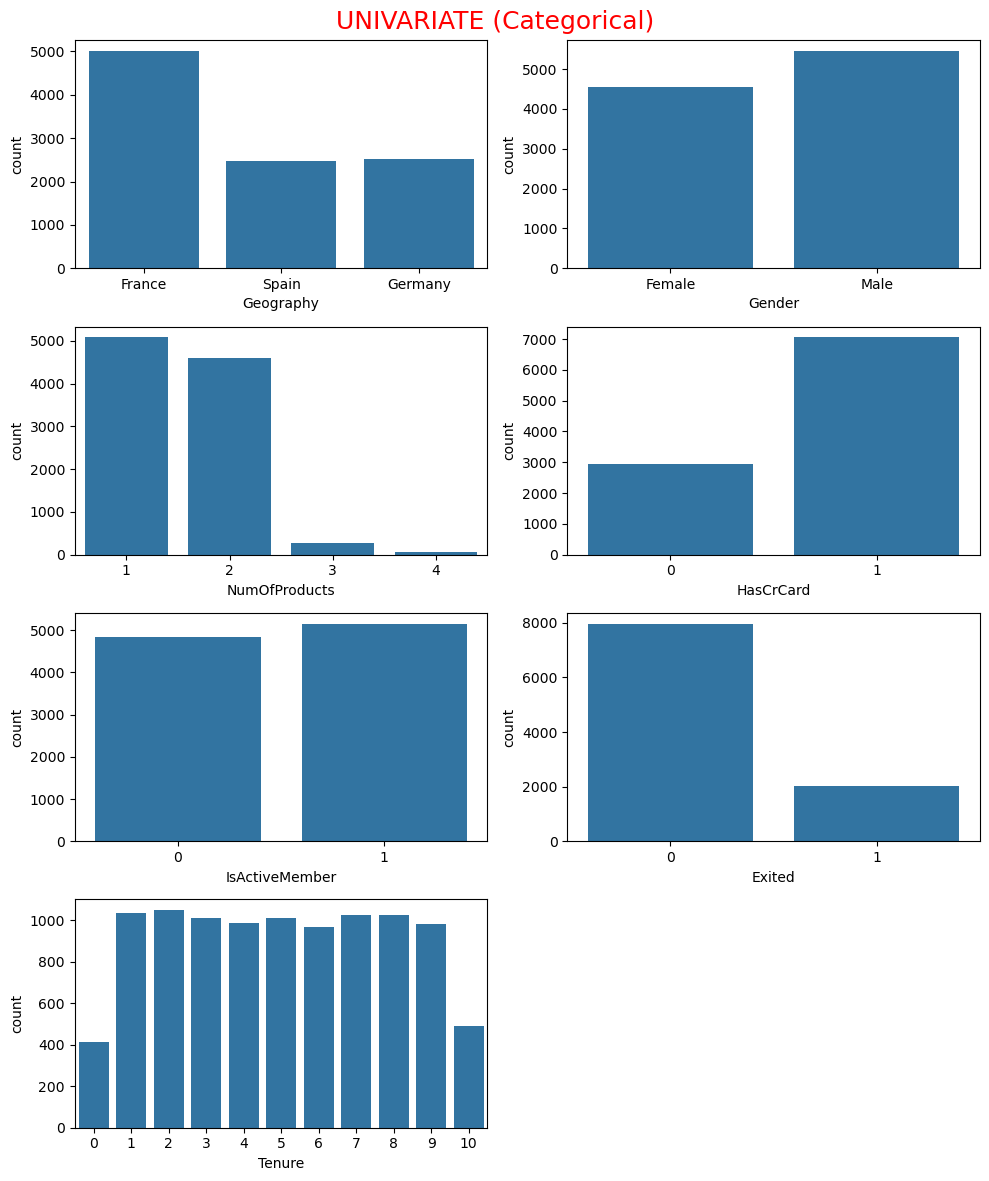

In [15]:
# Explore the Categorical columns

t=1
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE (Categorical)',color='red',size=18)
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

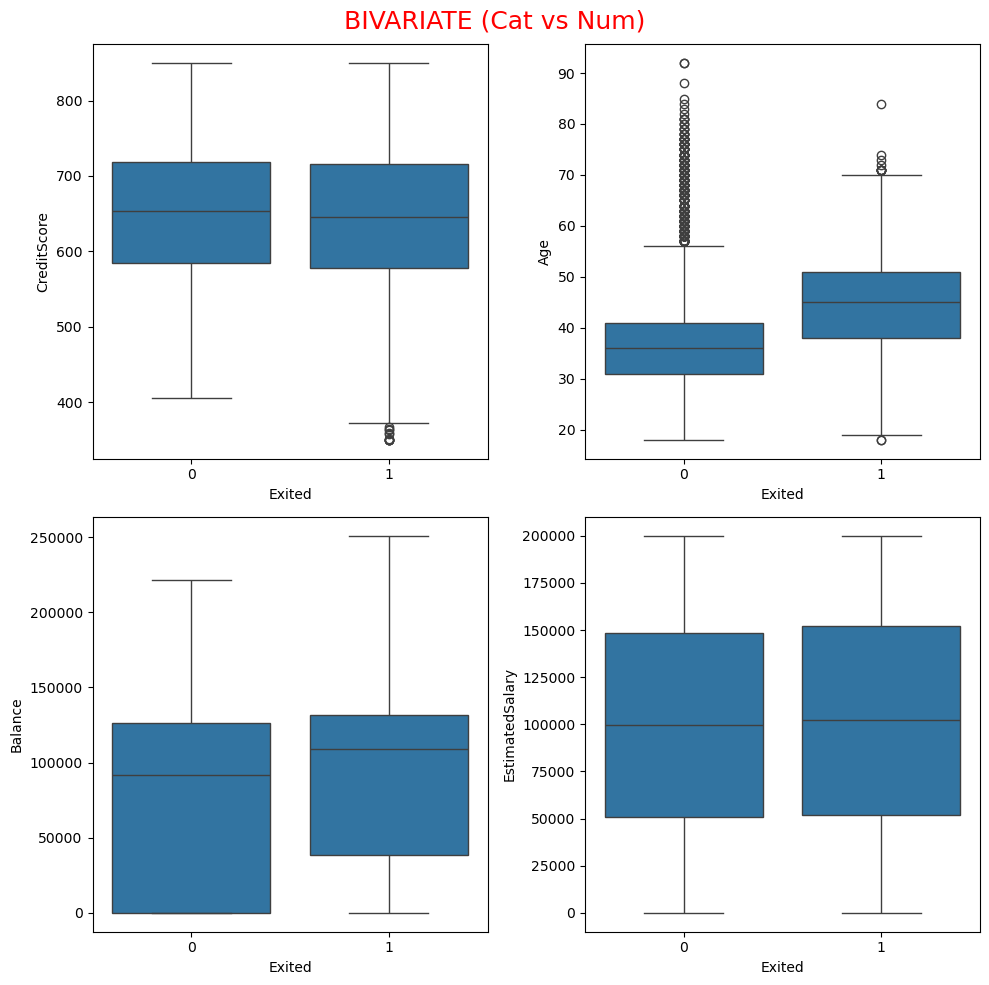

In [17]:
# Cat vs Num
t=1
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,y=i,x='Exited')
    t+=1
plt.tight_layout()
plt.show()

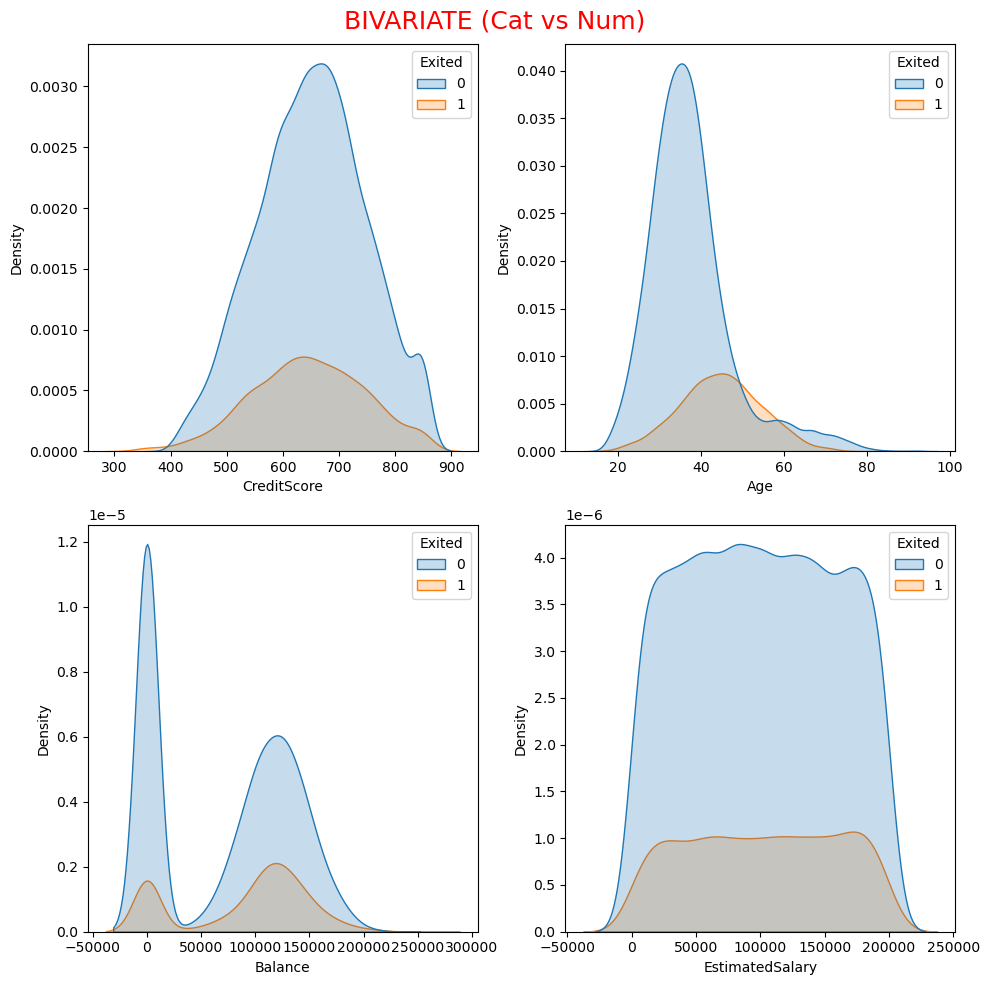

In [18]:
# Cat vs Num
t=1
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,hue='Exited',fill=True)
    t+=1
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

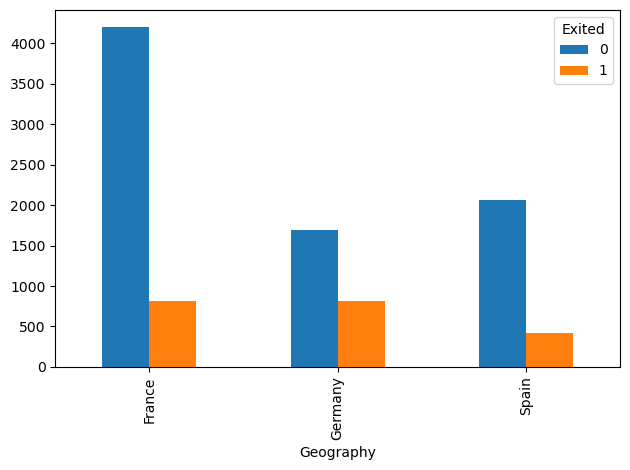

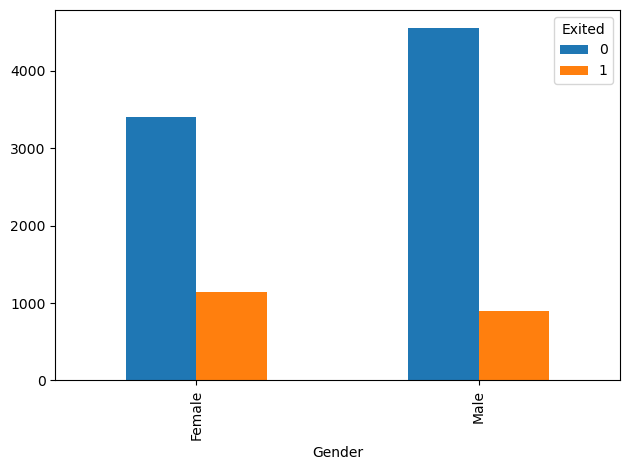

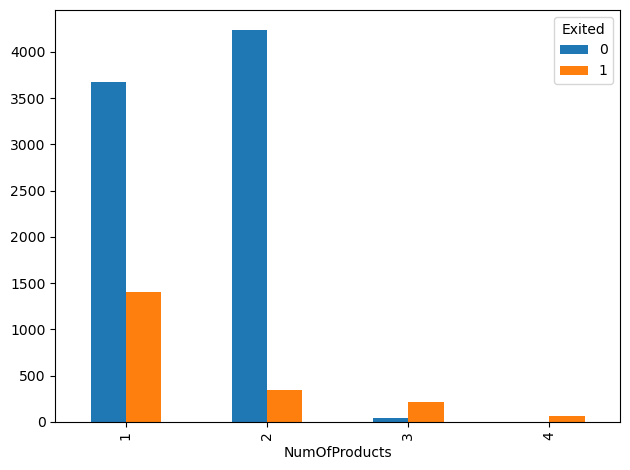

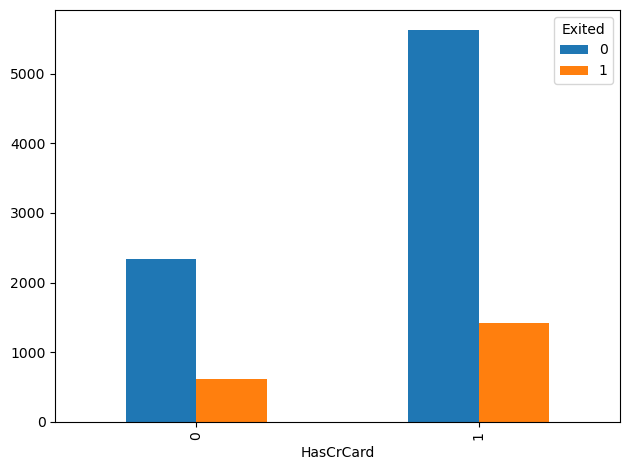

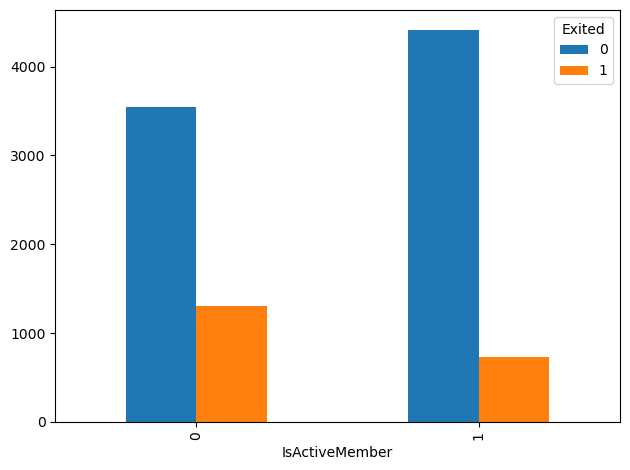

<Figure size 640x480 with 0 Axes>

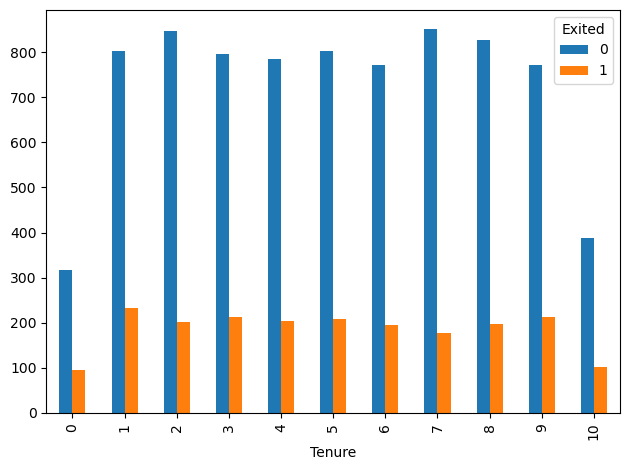

In [19]:
# cat vs cat

plt.figure(figsize=(10,10))
for i in cat_cols:
    if i != 'Exited':
        pd.crosstab(data[i],data['Exited']).plot(kind='bar')
    plt.tight_layout()
    plt.show()
        

## Multivaraite Analysis

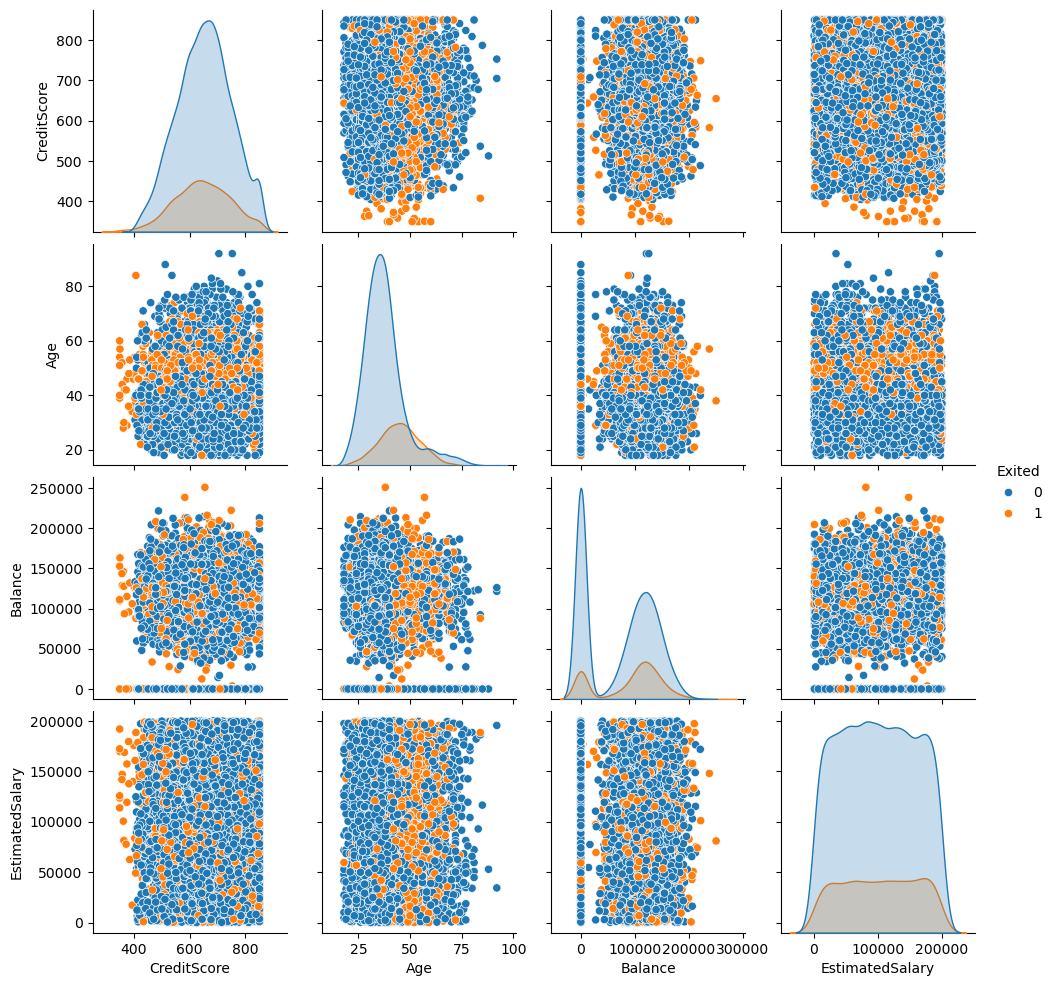

In [21]:
sns.pairplot(data=data,x_vars=num_cols,y_vars=num_cols,hue='Exited')
plt.show()

## Data Preprocessing

In [23]:
# Remove the redundant columns
data.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

In [24]:
data.drop(columns=['RowNumber', 'Surname'],inplace=True)

In [25]:
data.set_index('CustomerId',inplace=True)

In [26]:
data.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  \
CustomerId                                                         
15634602            619    France  Female   42       2      0.00   
15647311            608     Spain  Female   41       1  83807.86   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15634602                1          1               1        101348.88       1  
15647311                1          0               1        112542.58       0

### Missing Value Treatment

In [28]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Outlier Treatment

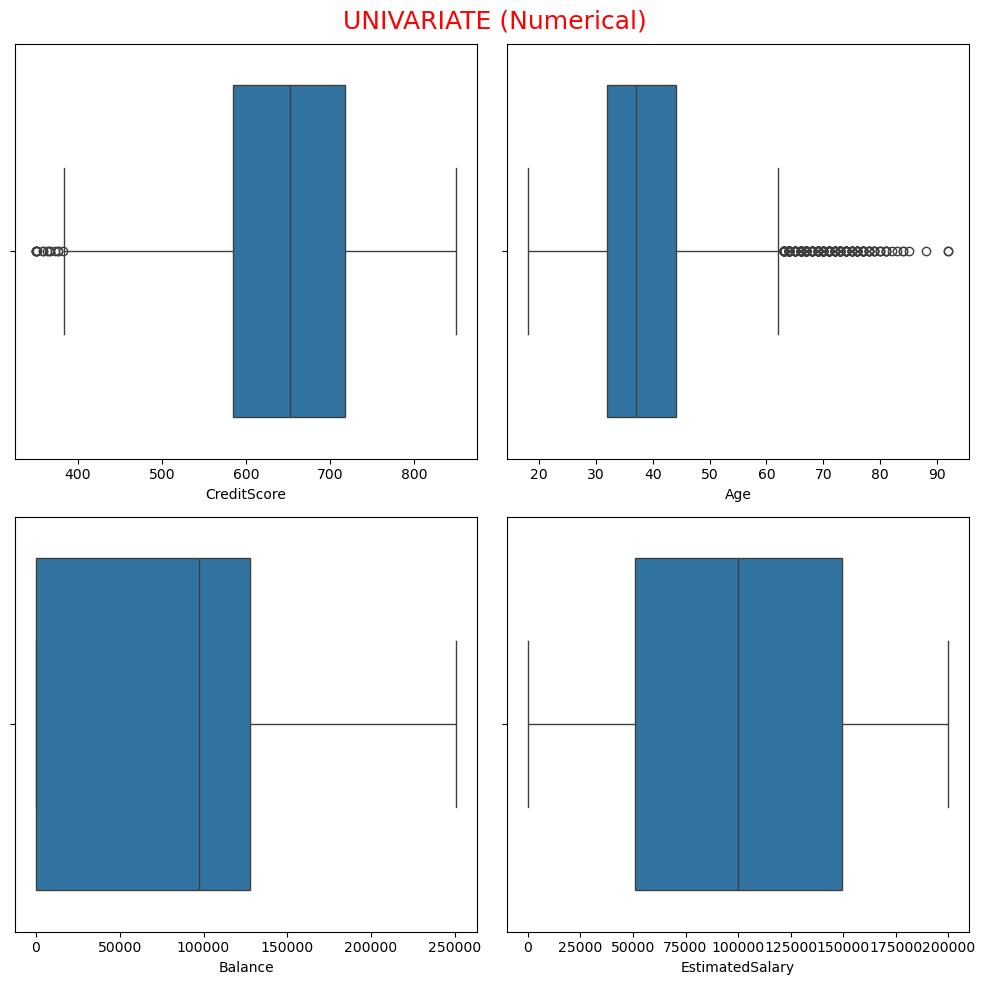

In [30]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Duplicates

In [32]:
data[data.duplicated()]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

## Feature Engineering

### Encoding

In [35]:
data[cat_cols]

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                               
15634602      France  Female              1          1               1   
15647311       Spain  Female              1          0               1   
15619304      France  Female              3          1               0   
15701354      France  Female              2          0               0   
15737888       Spain  Female              1          1               1   
...              ...     ...            ...        ...             ...   
15606229      France    Male              2          1               0   
15569892      France    Male              1          1               1   
15584532      France  Female              1          0               1   
15682355     Germany    Male              2          1               0   
15628319      France  Female              1          1               0   

            Exited  Tenure  
CustomerId                  
15634602         1       2  
15647311         0       1  
15619304         1       8  
15701354         0       1  
15737888         0       2  
...            ...     ...  
15606229         0       5  
15569892         0      10  
15584532         1       7  
15682355         1       3  
15628319         0       4  

[10000 rows x 7 columns]

In [36]:
map_dic = round(data.groupby(by='Geography')['Exited'].mean(),2).to_dict()

In [37]:
data['Geography'] = data['Geography'].map(map_dic)

In [38]:
data.head(3)

CreditScore  Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                           
15634602            619       0.16  Female   42       2       0.00   
15647311            608       0.17  Female   41       1   83807.86   
15619304            502       0.16  Female   42       8  159660.80   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15634602                1          1               1        101348.88       1  
15647311                1          0               1        112542.58       0  
15619304                3          1               0        113931.57       1

In [39]:
data = pd.get_dummies(data,columns=['Gender'],drop_first=True,dtype=int)

In [40]:
data.head(3)

CreditScore  Geography  Age  Tenure    Balance  NumOfProducts  \
CustomerId                                                                  
15634602            619       0.16   42       2       0.00              1   
15647311            608       0.17   41       1   83807.86              1   
15619304            502       0.16   42       8  159660.80              3   

            HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
CustomerId                                                                   
15634602            1               1        101348.88       1            0  
15647311            0               1        112542.58       0            0  
15619304            1               0        113931.57       1            0

### Feature Scalling

In [42]:
# Use Standard Scaler to scale the numeric columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [43]:
data.head(3)

CreditScore  Geography       Age  Tenure   Balance  NumOfProducts  \
CustomerId                                                                      
15634602      -0.326221       0.16  0.293517       2 -1.225848              1   
15647311      -0.440036       0.17  0.198164       1  0.117350              1   
15619304      -1.536794       0.16  0.293517       8  1.333053              3   

            HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
CustomerId                                                                   
15634602            1               1         0.021886       1            0  
15647311            0               1         0.216534       0            0  
15619304            1               0         0.240687       1            0

### Feature Transformation

In [45]:
for i in num_cols:
    print(i,data[i].skew())

CreditScore -0.07160660820092549
Age 1.0113202630234546
Balance -0.1411087109415436
EstimatedSalary 0.0020853576615585175


In [46]:
pt= PowerTransformer(standardize=False)
data[num_cols] = pt.fit_transform(data[num_cols])

In [47]:
for i in num_cols:
    print(i,data[i].skew())

CreditScore -0.007742469381343216
Age -0.007158918463030075
Balance -0.005238139997495317
EstimatedSalary -0.00033028319658614743


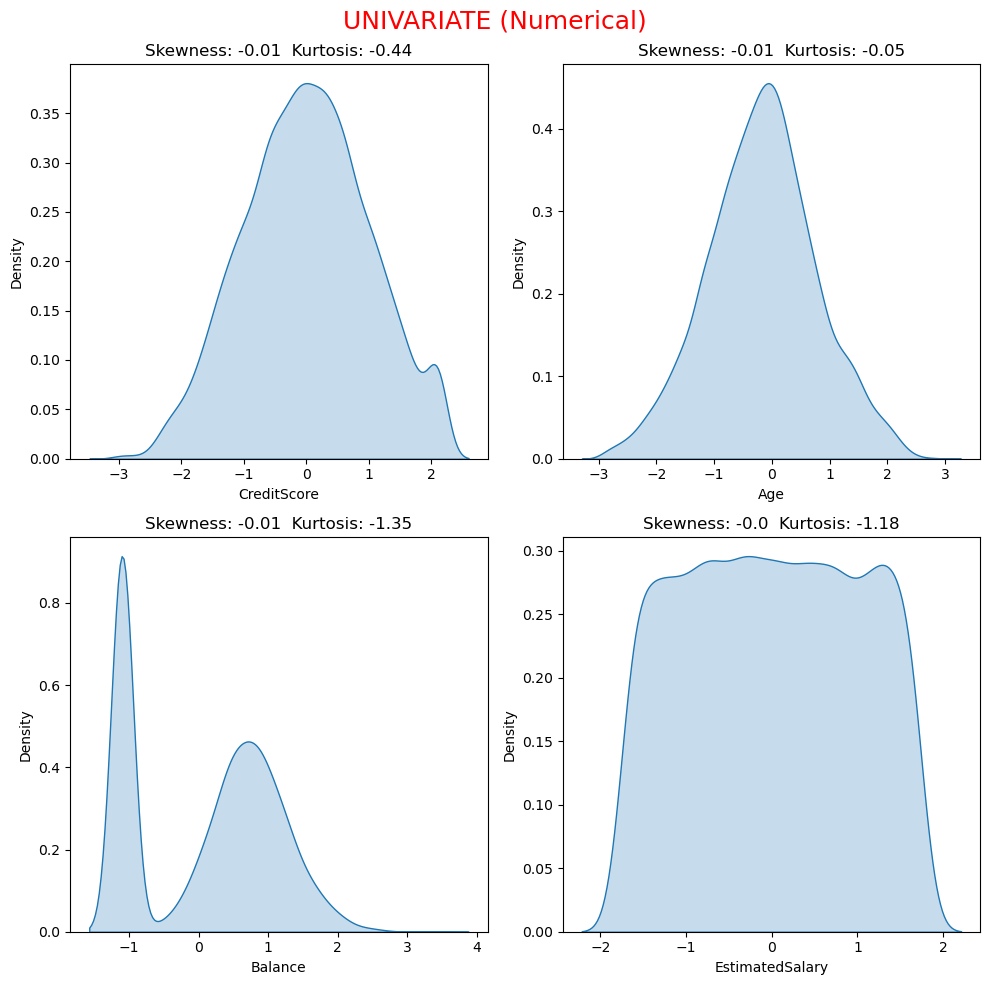

In [48]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    s,k = data[i].skew(),data[i].kurt()
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)}  Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

In [49]:
data.head()

CreditScore  Geography       Age  Tenure   Balance  NumOfProducts  \
CustomerId                                                                      
15634602      -0.324183       0.16  0.273553       2 -1.101323              1   
15647311      -0.436443       0.17  0.188682       1  0.118955              1   
15619304      -1.502276       0.16  0.273553       8  1.499141              3   
15701354       0.506167       0.16  0.007442       1 -1.101323              2   
15737888       2.122908       0.17  0.355165       2  0.848624              1   

            HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
CustomerId                                                                   
15634602            1               1         0.021886       1            0  
15647311            0               1         0.216471       0            0  
15619304            1               0         0.240610       1            0  
15701354            0               0        -0.108934       0            0  
15737888            1               1        -0.365448       0            0

In [50]:
data.shape

(10000, 11)

## Predictive Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,roc_auc_score,roc_curve)
from sklearn.model_selection import train_test_split

### Train-Test_Split

In [54]:
y = data['Exited']
x = data.drop(columns=['Exited'])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=8000,
                                                   stratify=y,random_state=2)

In [56]:
y.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [57]:
y_train.value_counts(normalize=True)

Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

In [58]:
y_test.value_counts(normalize=True)

Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64

In [59]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8000, 10) (8000,)
(2000, 10) (2000,)


### Logistic Regression

In [61]:
model_lr = LogisticRegression(random_state=2)

In [62]:
model_lr.fit(x_train, y_train)

LogisticRegression(random_state=2)

In [63]:
model_lr.coef_

array([[-0.06233365,  3.93479758,  0.95974396, -0.01032647,  0.22867827,
        -0.02692303, -0.01508536, -1.05078078,  0.02960806, -0.54181239]])

In [64]:
model_lr.intercept_

array([-1.41888906])

In [65]:
y_predh_lr = model_lr.predict(x_test)

In [66]:
y_preds_lr = model_lr.predict_proba(x_test)[:,1]

In [67]:
print(classification_report(y_test,y_predh_lr))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.60      0.23      0.33       407

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



In [68]:
# ROC Curve
fpr, tpr, thres = roc_curve(y_test, y_preds_lr)

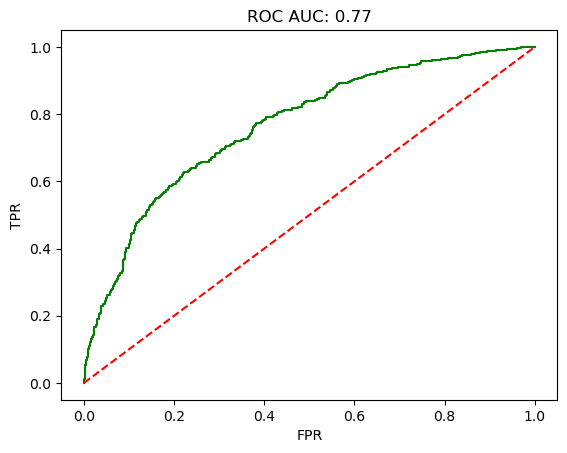

In [69]:
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [70]:
# pip install imblearn

In [71]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [72]:
sampler = SMOTE()

In [73]:
x_train_os, y_train_os = sampler.fit_resample(x_train,y_train)

In [74]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [75]:
y_train_os.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [76]:
# SMOTE : Synthetic Minority Oversampling Technique

In [77]:
model_lr = LogisticRegression(random_state=2)

In [78]:
model_lr.fit(x_train_os,y_train_os)

LogisticRegression(random_state=2)

In [79]:
y_predh_lr = model_lr.predict(x_test)
y_preds_lr = model_lr.predict_proba(x_test)[:,1]

In [80]:
print(classification_report(y_test,y_predh_lr))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1593
           1       0.38      0.66      0.48       407

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.71      0.73      2000



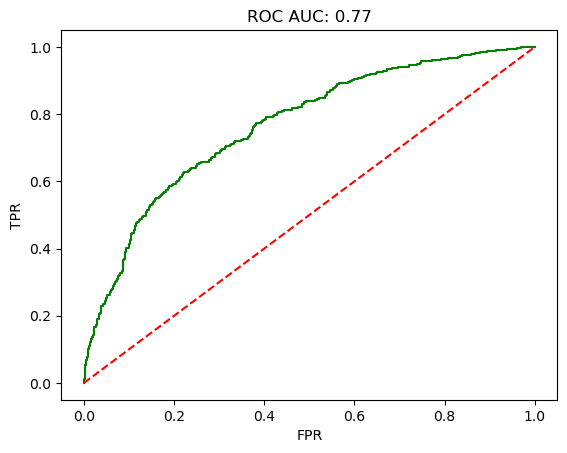

In [81]:
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [82]:
# Class Weights

In [83]:
obs_total = len(y_train)
obs_0 = y_train.value_counts()[0]
obs_1 = y_train.value_counts()[1]

w0 = obs_total/(2*obs_0)
w1 = obs_total/(2*obs_1)

In [84]:
w0,w1

(0.6279434850863422, 2.4539877300613497)

In [85]:
model_lr = LogisticRegression(class_weight={0:w0,1:w1},random_state=2)
model_lr.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.6279434850863422, 1: 2.4539877300613497},
                   random_state=2)

In [86]:
y_predh_lr = model_lr.predict(x_test)
y_preds_lr = model_lr.predict_proba(x_test)[:,1]

In [87]:
print(classification_report(y_test,y_predh_lr))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1593
           1       0.37      0.70      0.48       407

    accuracy                           0.70      2000
   macro avg       0.63      0.70      0.63      2000
weighted avg       0.79      0.70      0.72      2000



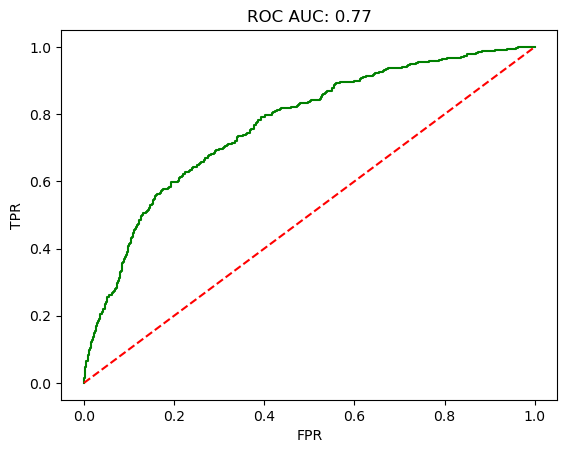

In [88]:
fpr, tpr, thres = roc_curve(y_test, y_preds_lr)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## KNN (K-Nearest Neighbour)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
model_knn = KNeighborsClassifier(n_neighbors=6,weights='distance')

In [92]:
model_knn.fit(x_train_os, y_train_os)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [93]:
y_predh_knn = model_knn.predict(x_test)
y_preds_knn = model_knn.predict_proba(x_test)[:,1]

In [94]:
y_preds_knn

array([0.32875358, 0.31490909, 1.        , ..., 0.49305796, 0.69924287,
       0.        ])

In [95]:
print(classification_report(y_test,y_predh_knn))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.60      0.49       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



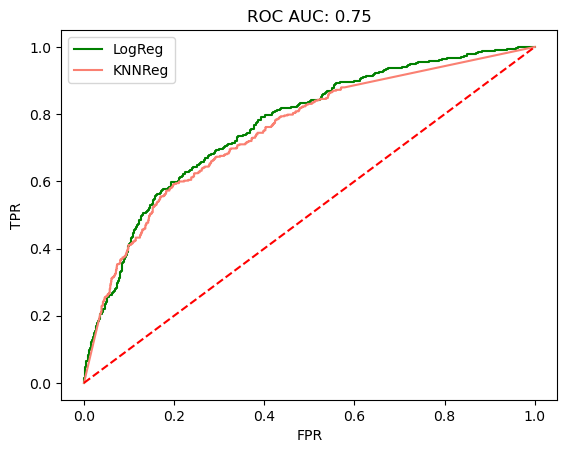

In [96]:
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres = roc_curve(y_test, y_preds_knn)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_knn),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [97]:
roc_auc_score(y_test, y_predh_lr)

0.6963789675654082

In [98]:
roc_auc_score(y_test, y_predh_knn)

0.6892709350336468

In [99]:
(6*3*2*2*3)/(14*6*6*6*6)

0.011904761904761904

In [100]:
0.0167/(0.0167+0.0119)

0.5839160839160839

In [101]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [102]:
y_predh_nb = model_nb.predict(x_test)
y_preds_nb = model_nb.predict_proba(x_test)[:,1]

In [103]:
print(classification_report(y_test, y_predh_nb))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1593
           1       0.59      0.30      0.40       407

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000



In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model_nb = GaussianNB()
model_nb.fit(x_train_os, y_train_os)

GaussianNB()

In [105]:
y_predh_nb = model_nb.predict(x_test)
y_preds_nb = model_nb.predict_proba(x_test)[:,1]

In [106]:
print(classification_report(y_test, y_predh_nb))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1593
           1       0.42      0.71      0.53       407

    accuracy                           0.74      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.74      0.76      2000



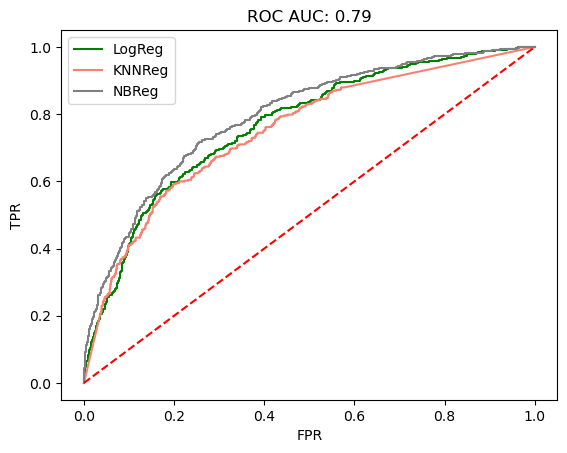

In [107]:
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_nb),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [108]:
print(roc_auc_score(y_test, y_preds_lr))
print(roc_auc_score(y_test, y_preds_knn))
print(roc_auc_score(y_test, y_preds_nb))

0.7672310214683096
0.750417597875225
0.79407759068776


In [109]:
import math
1*(math.log(1,2))

0.0

In [110]:
(1)*(math.log(1,2))

0.0

In [111]:
-(0.714)*(math.log(0.714,2))-(0.285)*(math.log(0.285,2))

0.8631322307807983

In [112]:
2/7

0.2857142857142857

In [113]:
(8/15)*0.9544340029249649

0.5090314682266479

In [114]:
(7/15)*(-(0.714)*(math.log(0.714,2))-(0.285)*(math.log(0.285,2)))

0.4027950410310392

In [115]:
92-72

20

In [116]:
1-(((0.33)**2)+((0.667)**2))

0.4462109999999999

In [117]:
(7/15)*(1-(((5/7)**2)+((2/7)**2)))

0.1904761904761905

In [118]:
(1-(((5/7)**2)+((2/7)**2)))

0.40816326530612246

## Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [121]:
model_dt = DecisionTreeClassifier(max_depth=7,class_weight={0:w0,1:w1}, max_leaf_nodes=24)

In [122]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6279434850863422,
                                     1: 2.4539877300613497},
                       max_depth=7, max_leaf_nodes=24)

In [123]:
y_predh_dt = model_dt.predict(x_test)
y_preds_dt = model_dt.predict_proba(x_test)[:,1]

In [124]:
print(classification_report(y_test,y_predh_dt))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.44      0.78      0.56       407

    accuracy                           0.75      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.75      0.78      2000



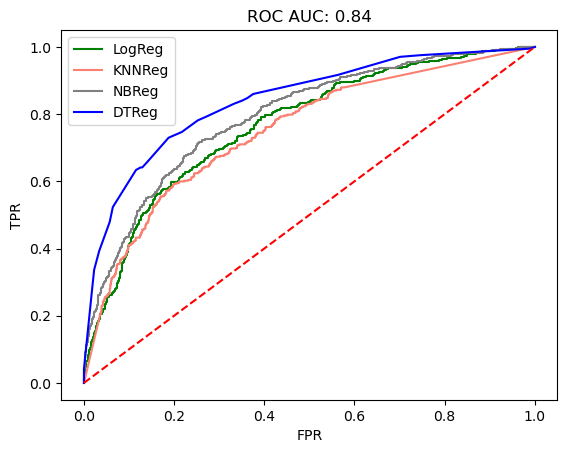

In [125]:
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_preds_dt)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot(fpr_dt,tpr_dt,color='blue', label='DTReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_dt),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [126]:
print(roc_auc_score(y_test, y_preds_lr))
print(roc_auc_score(y_test, y_preds_knn))
print(roc_auc_score(y_test, y_preds_nb))
print(roc_auc_score(y_test, y_preds_dt))

0.7672310214683096
0.750417597875225
0.79407759068776
0.8410336376438071


In [127]:
# Hyper parameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
grid = {'max_depth':[6,7,8,9],'max_leaf_nodes':[24,25,26,27]}

In [130]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0:w0,1:w0}),
                   scoring='roc_auc',cv=6,verbose=1,n_jobs=5,param_grid=grid)

In [131]:
gscv.fit(x_train,y_train)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


GridSearchCV(cv=6,
             estimator=DecisionTreeClassifier(class_weight={0: 0.6279434850863422,
                                                            1: 0.6279434850863422}),
             n_jobs=5,
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_leaf_nodes': [24, 25, 26, 27]},
             scoring='roc_auc', verbose=1)

In [132]:
gscv.best_score_

0.8373102662614972

In [133]:
gscv.best_params_

{'max_depth': 6, 'max_leaf_nodes': 27}

In [134]:
pd.DataFrame({'FI':model_dt.feature_importances_}, index=x_train.columns).sort_values(by='FI',ascending=False)

FI
Age              0.448566
NumOfProducts    0.313513
Balance          0.124288
IsActiveMember   0.068331
Geography        0.045302
CreditScore      0.000000
Tenure           0.000000
HasCrCard        0.000000
EstimatedSalary  0.000000
Gender_Male      0.000000

# ENsemble Models
## Bagging Models (B: Bootstrap, agg: Aggregation)
### 1. Bagging

In [136]:
from sklearn.ensemble import BaggingClassifier

In [140]:
model_bagg = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=13),n_estimators=100,n_jobs=5,random_state=2,oob_score=True)

In [142]:
model_bagg.fit(x_train_os, y_train_os)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=13),
                  n_estimators=100, n_jobs=5, oob_score=True, random_state=2)

In [143]:
model_bagg.oob_score_

0.823076923076923

In [144]:
y_predh_bagg = model_bagg.predict(x_test)
y_preds_bagg = model_bagg.predict_proba(x_test)[:,1]

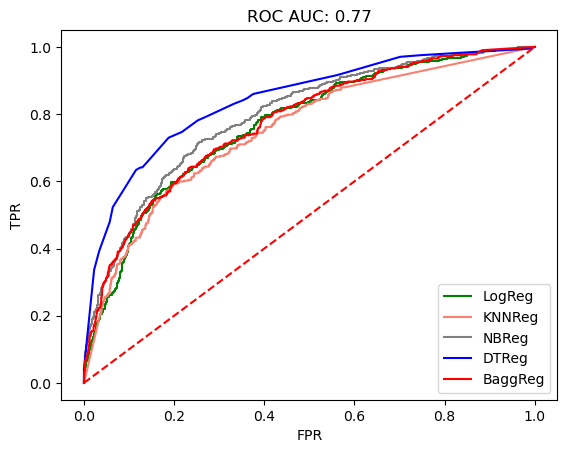

In [145]:
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_preds_dt)
fpr_bagg, tpr_bagg, thres_bagg = roc_curve(y_test, y_preds_bagg)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot(fpr_dt,tpr_dt,color='blue', label='DTReg')
plt.plot(fpr_bagg,tpr_bagg,color='red', label='BaggReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_bagg),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [146]:
roc_auc_score(y_test,y_preds_bagg)

0.7735987142766804

### 2. Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
model_rf = RandomForestClassifier(n_estimators=3,max_depth=3,max_features=None,random_state=2)

In [150]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=None, n_estimators=3,
                       random_state=2)

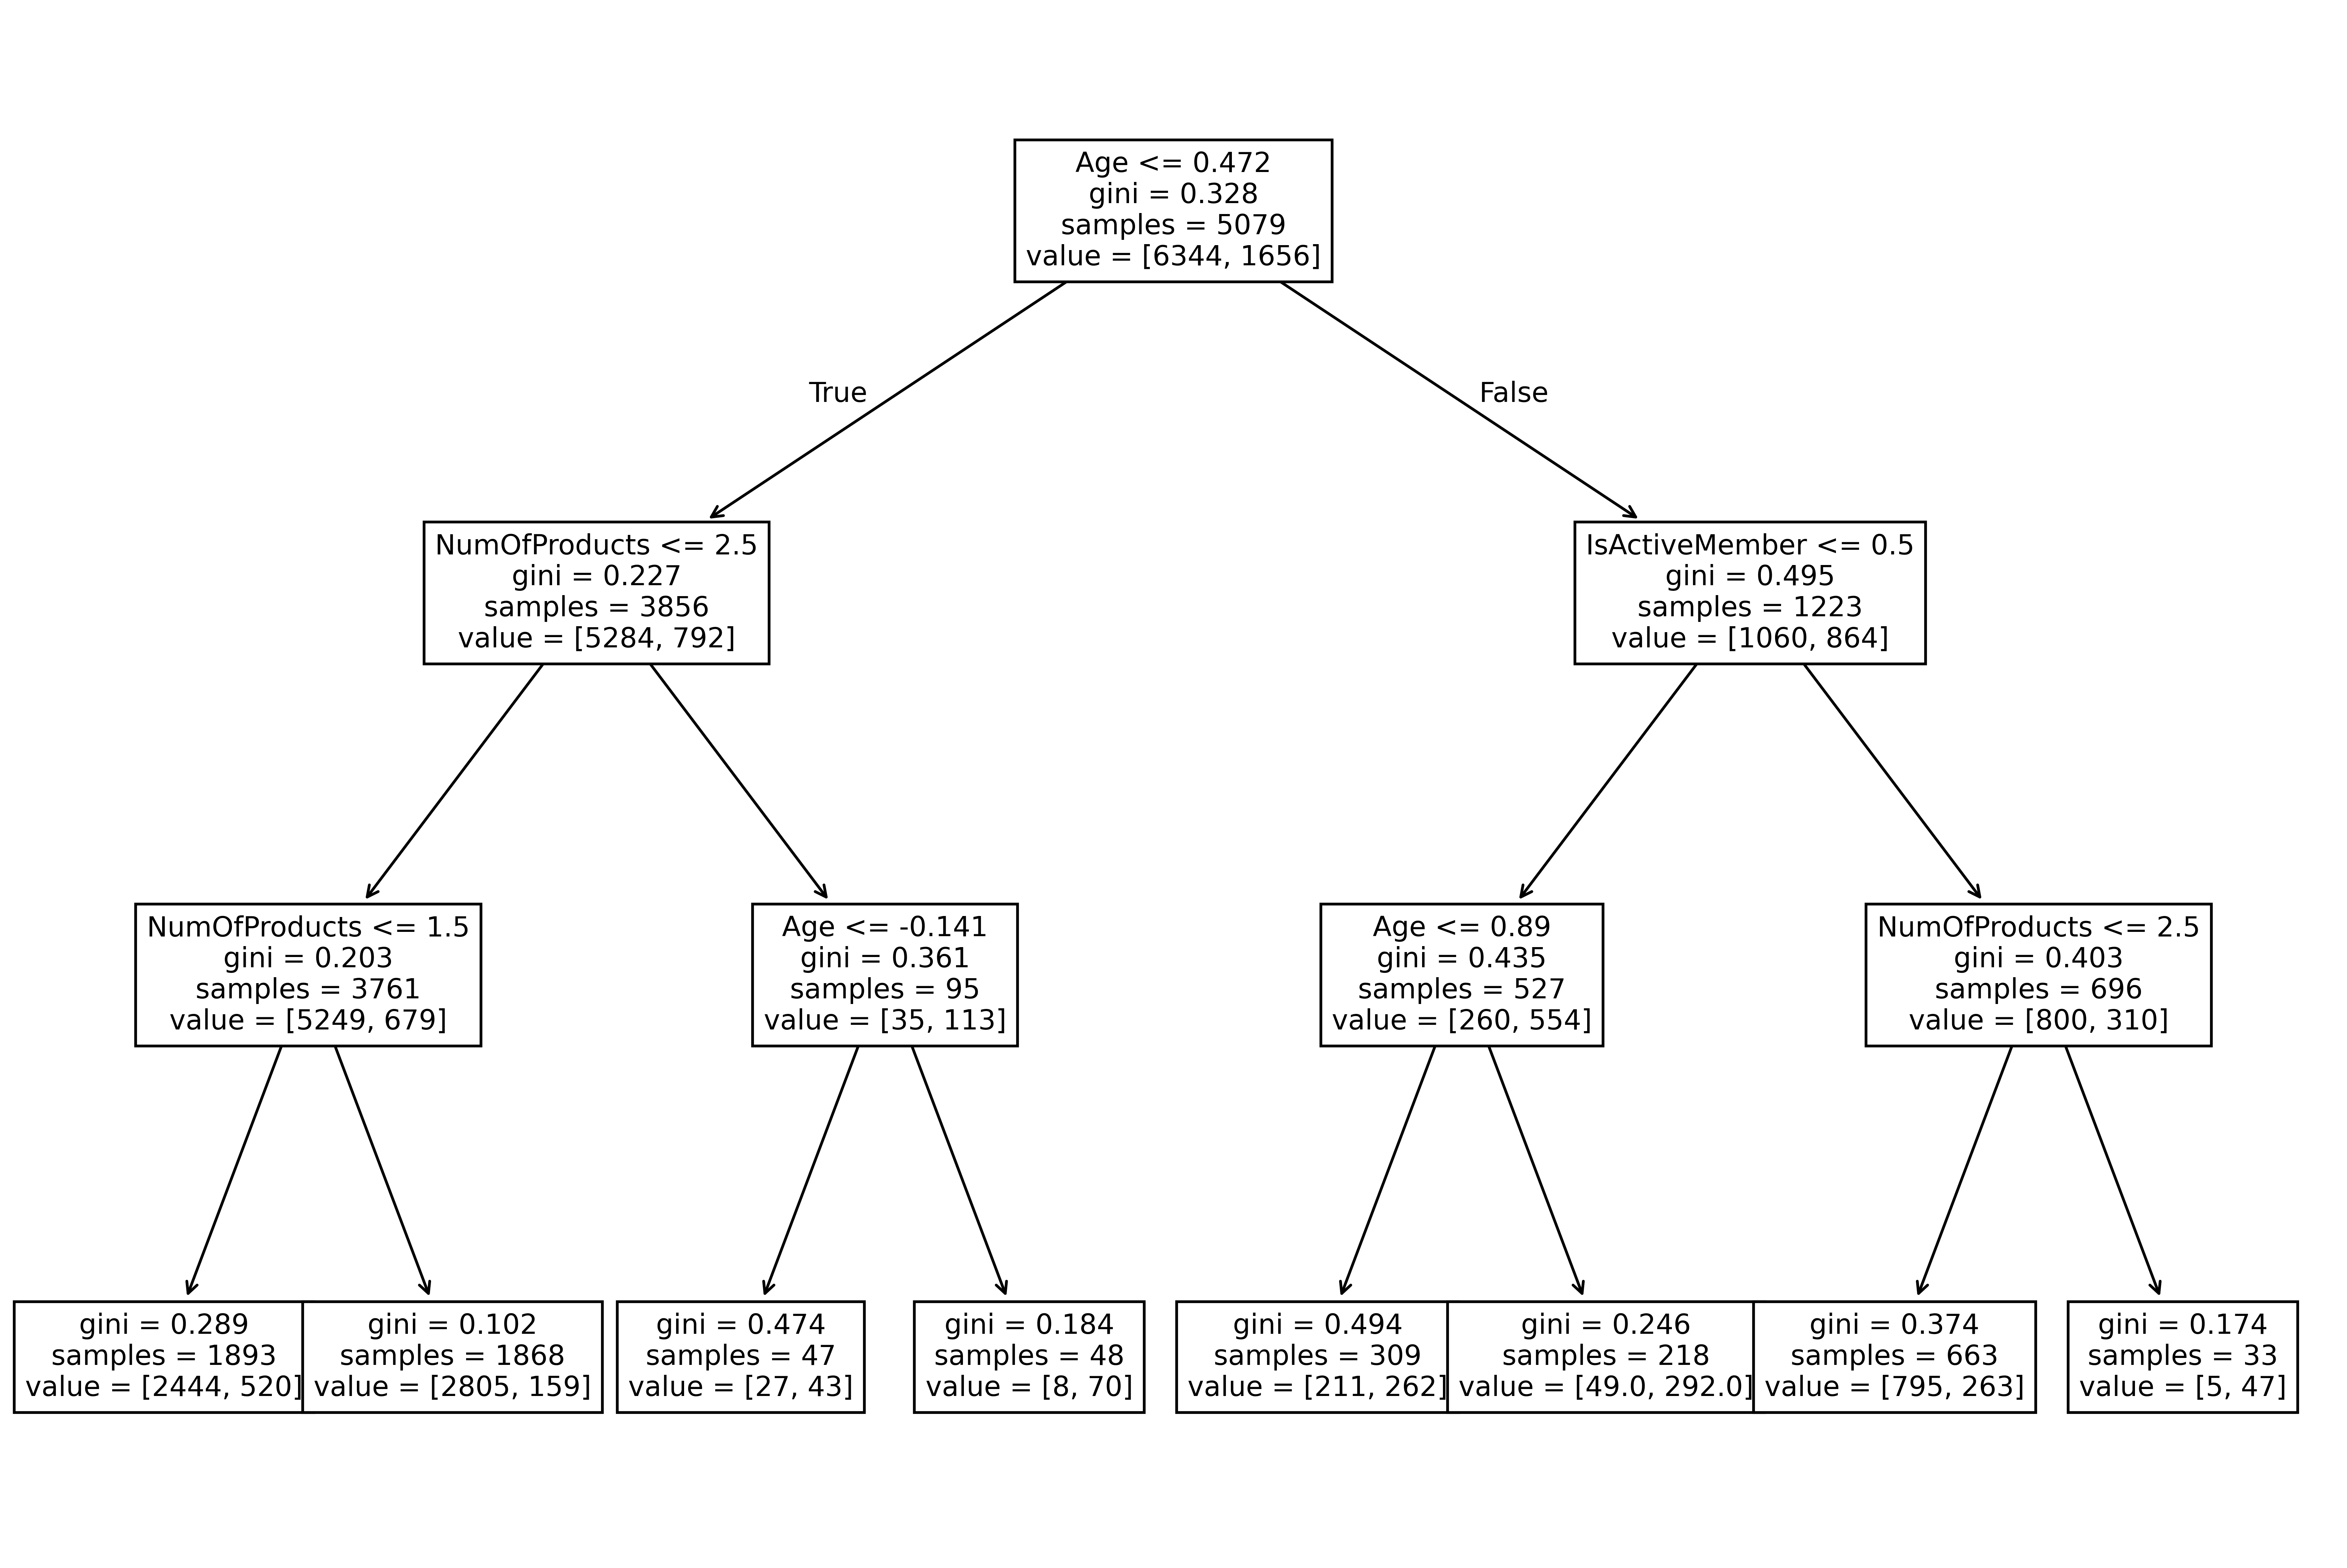

In [151]:
plt.figure(figsize=(15,10),dpi=600)
plot_tree(model_rf[2],feature_names=x_train.columns.to_list(),fontsize=10)
plt.show()

In [152]:
model_rf = RandomForestClassifier(n_estimators=300,max_depth=5,max_features=None,class_weight={0:w0,1:w1},random_state=2,oob_score=True)

In [153]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.6279434850863422,
                                     1: 2.4539877300613497},
                       max_depth=5, max_features=None, n_estimators=300,
                       oob_score=True, random_state=2)

In [154]:
y_predh_rf = model_rf.predict(x_test)
y_preds_rf = model_rf.predict_proba(x_test)[:,1]

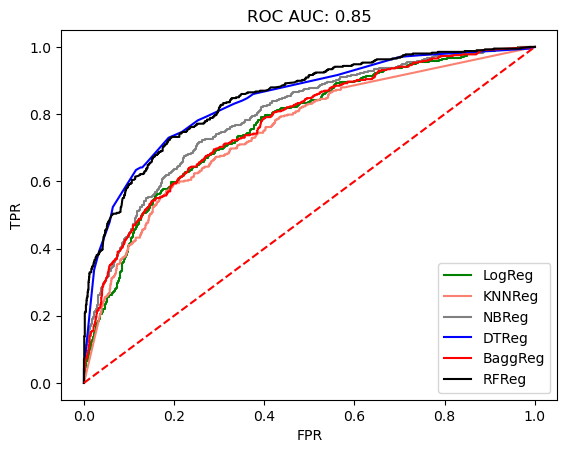

In [155]:
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_preds_dt)
fpr_bagg, tpr_bagg, thres_bagg = roc_curve(y_test, y_preds_bagg)
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, y_preds_rf)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot(fpr_dt,tpr_dt,color='blue', label='DTReg')
plt.plot(fpr_bagg,tpr_bagg,color='red', label='BaggReg')
plt.plot(fpr_rf,tpr_rf,color='Black', label='RFReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_rf),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## Adaptive Boosting

In [161]:
from sklearn.ensemble import AdaBoostClassifier

In [284]:
model_ada = AdaBoostClassifier(n_estimators=200,random_state=1,learning_rate=0.1)

In [286]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=1)

In [288]:
y_predh_ada = model_ada.predict(x_test)
y_preds_ada = model_ada.predict_proba(x_test)[:,1]

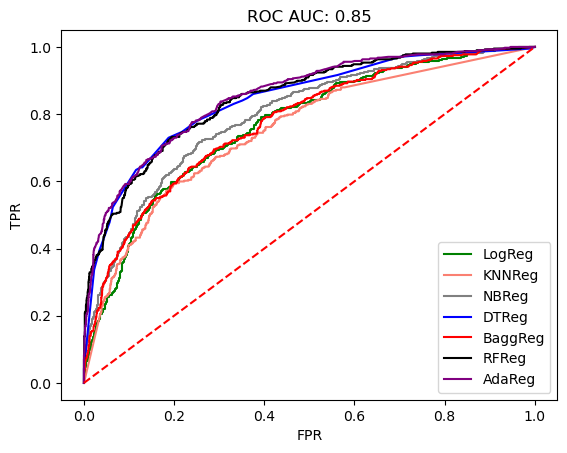

In [290]:
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_preds_dt)
fpr_bagg, tpr_bagg, thres_bagg = roc_curve(y_test, y_preds_bagg)
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, y_preds_rf)
fpr_ada, tpr_ada, thres_ada = roc_curve(y_test, y_preds_ada)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot(fpr_dt,tpr_dt,color='blue', label='DTReg')
plt.plot(fpr_bagg,tpr_bagg,color='red', label='BaggReg')
plt.plot(fpr_rf,tpr_rf,color='Black', label='RFReg')
plt.plot(fpr_ada,tpr_ada,color='Purple', label='AdaReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_ada),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [307]:
print(roc_auc_score(y_test, y_preds_lr))
print(roc_auc_score(y_test, y_preds_knn))
print(roc_auc_score(y_test, y_preds_nb))
print(roc_auc_score(y_test, y_preds_rf))
print(roc_auc_score(y_test, y_preds_dt))
print(roc_auc_score(y_test, y_preds_ada))

0.7672310214683096
0.750417597875225
0.79407759068776
0.8460054815987019
0.8410336376438071
0.8528513104784291


In [266]:
grid = {'n_estimators':[190,210,180,215],'learning_rate':[0.1,0.5,1,10]}
gscv = GridSearchCV(estimator=AdaBoostClassifier(),
                   scoring='roc_auc',cv=6,verbose=1,n_jobs=5,param_grid=grid)
gscv.fit(x_train_os,y_train_os)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


GridSearchCV(cv=6, estimator=AdaBoostClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.5, 1, 10],
                         'n_estimators': [190, 210, 180, 215]},
             scoring='roc_auc', verbose=1)

In [267]:
gscv.best_params_

{'learning_rate': 1, 'n_estimators': 215}

In [299]:
# Score on K-fold to ensure there is no overfitting
from sklearn.model_selection import cross_val_score,KFold

In [309]:
score_ada = cross_val_score(estimator=model_ada,
               cv=KFold(n_splits=5,shuffle=True,random_state=2),scoring='roc_auc',
               verbose=1,X=x_train,y=y_train)

In [310]:
score_rf = cross_val_score(estimator=model_rf,
               cv=KFold(n_splits=5,shuffle=True,random_state=2),scoring='roc_auc',
               verbose=1,X=x_train,y=y_train)

In [317]:
(score_ada.std()/score_ada.mean())*100    # High variance

1.1598104005431793

In [319]:
(score_rf.std()/score_rf.mean())*100     # Low Variance

0.768546937958667

## Gradient Boost

In [327]:
from sklearn.ensemble import GradientBoostingClassifier

In [361]:
model_gb = GradientBoostingClassifier(learning_rate=0.5,max_depth=12,n_estimators=200)

In [363]:
model_gb.fit(x_train_os,y_train_os)

GradientBoostingClassifier(learning_rate=0.5, max_depth=12, n_estimators=200)

In [364]:
y_predh_gb = model_gb.predict(x_test)
y_preds_gb = model_gb.predict_proba(x_test)[:,1]

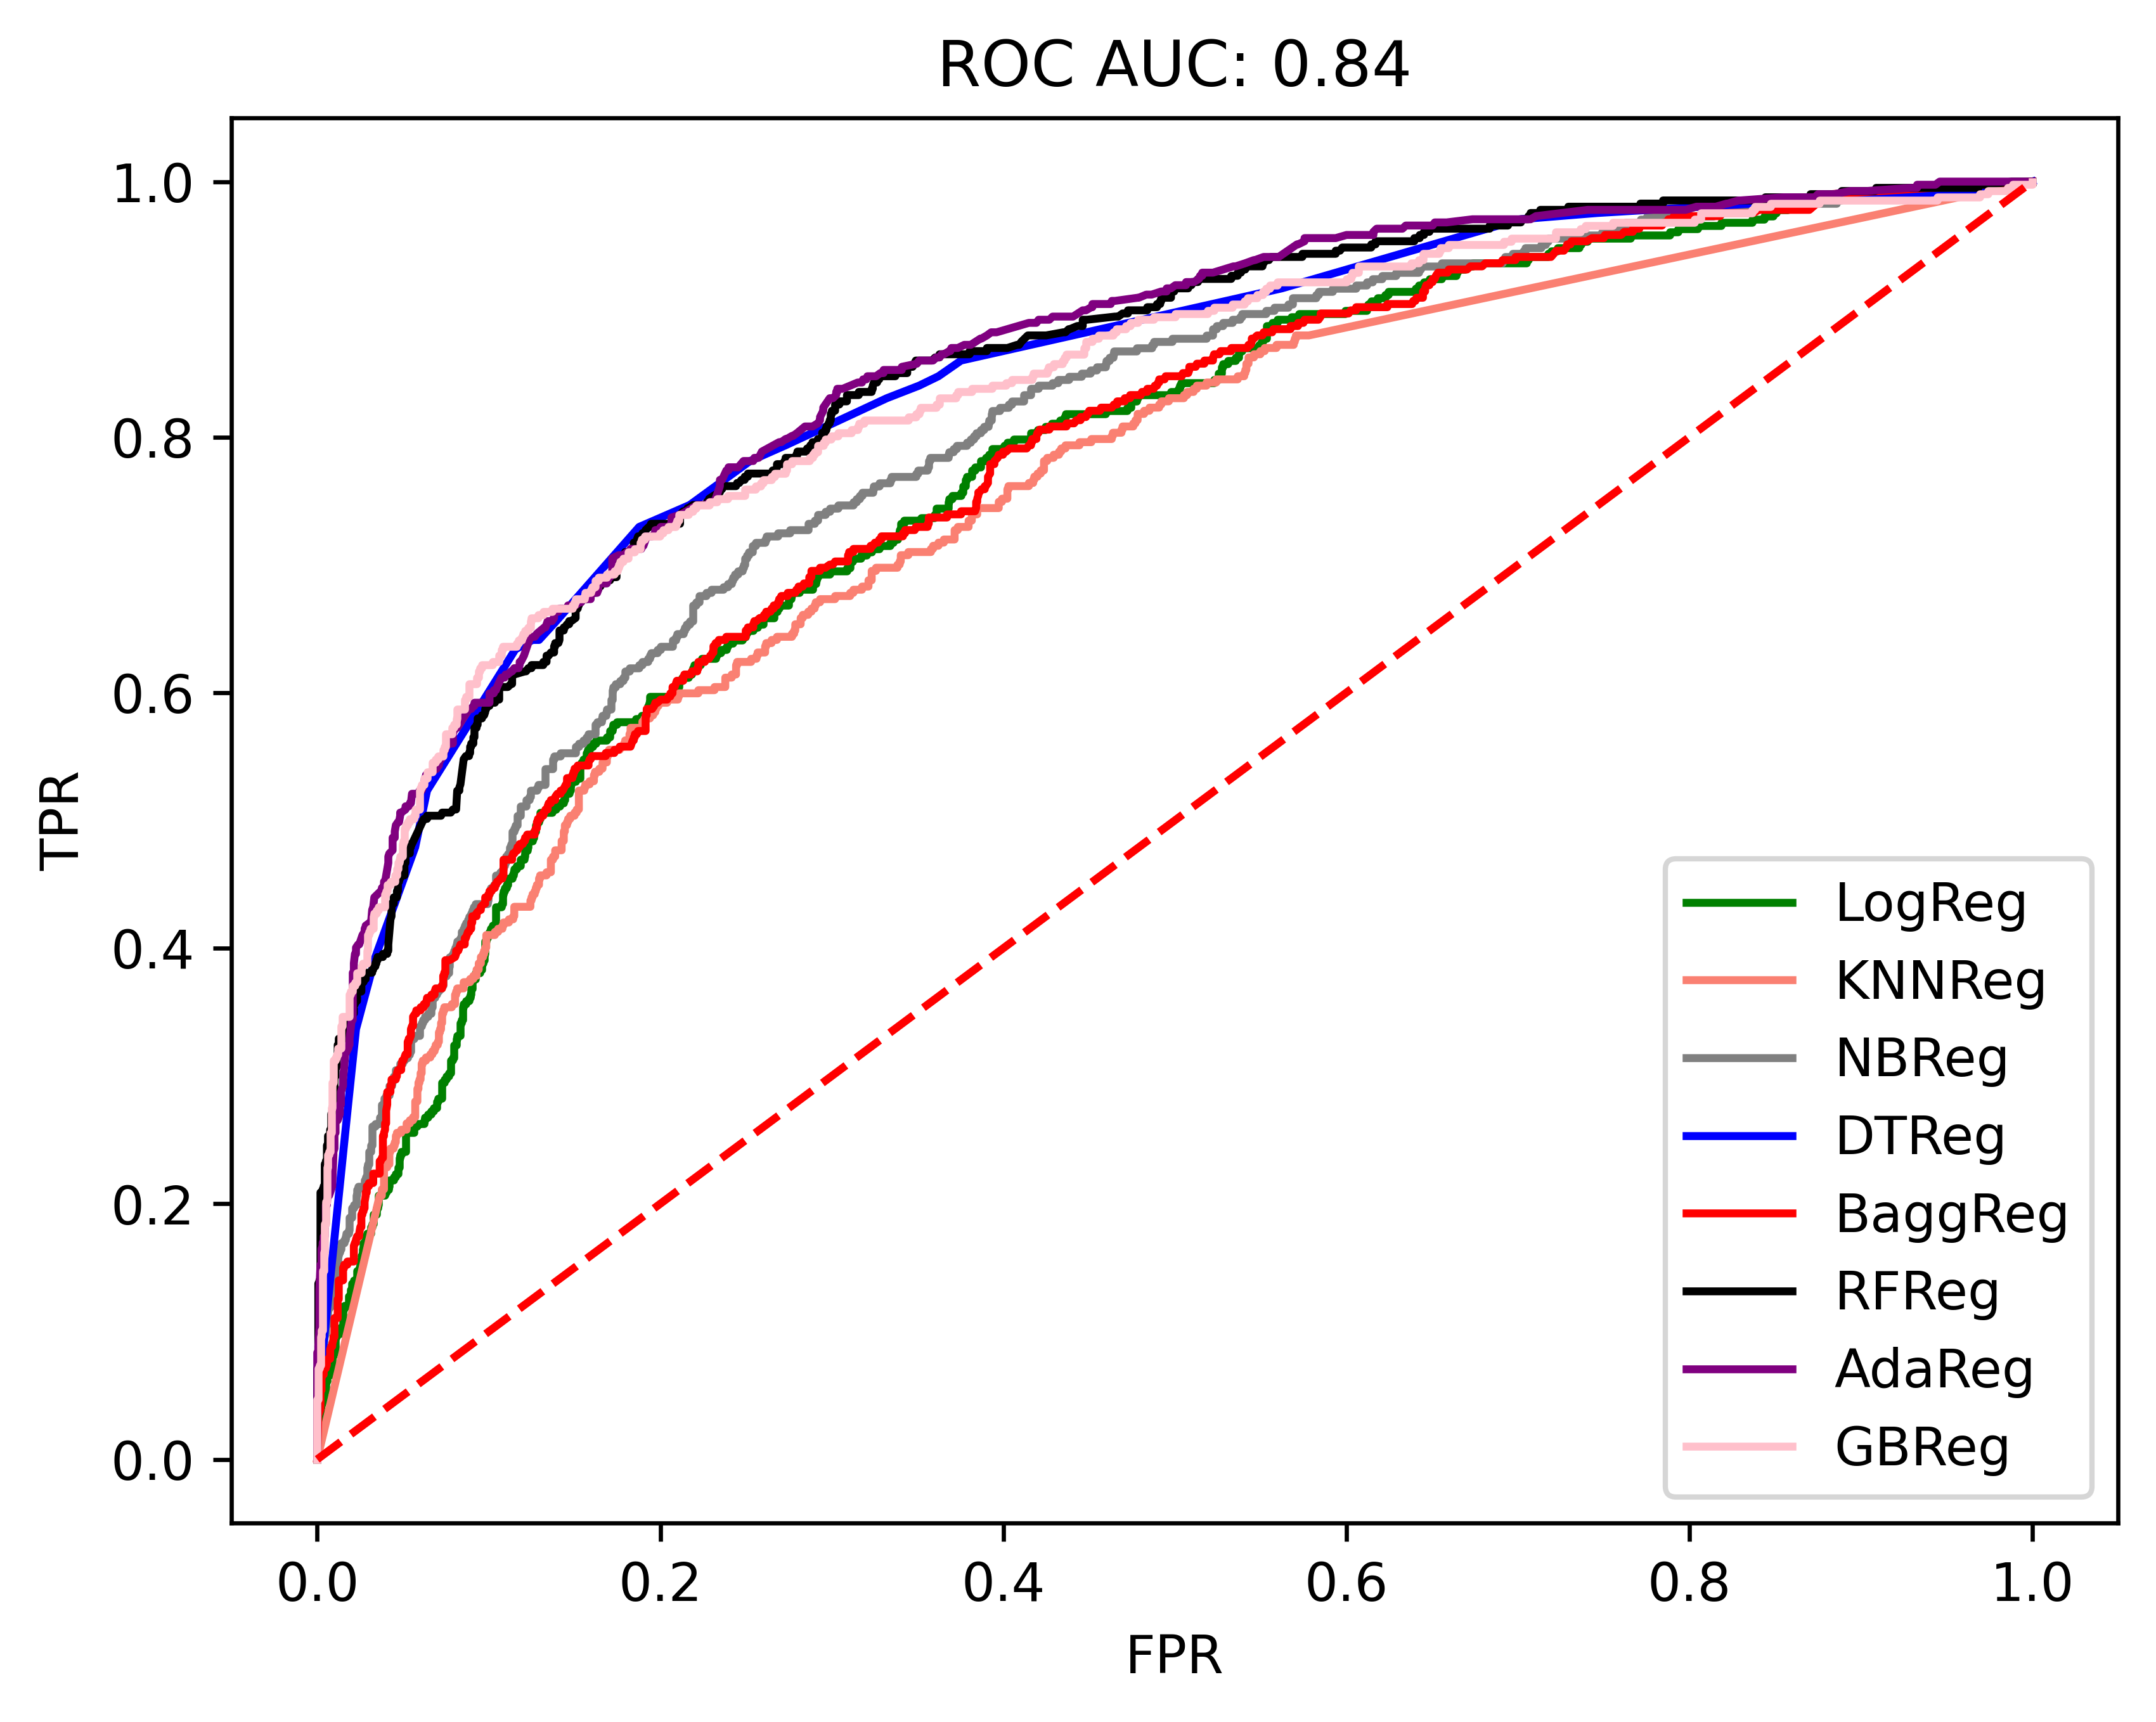

In [371]:
plt.figure(dpi=600)
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_preds_dt)
fpr_bagg, tpr_bagg, thres_bagg = roc_curve(y_test, y_preds_bagg)
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, y_preds_rf)
fpr_ada, tpr_ada, thres_ada = roc_curve(y_test, y_preds_ada)
fpr_gb, tpr_gb, thres_gb = roc_curve(y_test, y_preds_gb)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot(fpr_dt,tpr_dt,color='blue', label='DTReg')
plt.plot(fpr_bagg,tpr_bagg,color='red', label='BaggReg')
plt.plot(fpr_rf,tpr_rf,color='Black', label='RFReg')
plt.plot(fpr_ada,tpr_ada,color='Purple', label='AdaReg')
plt.plot(fpr_gb,tpr_gb,color='Pink', label='GBReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_gb),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [373]:
print(roc_auc_score(y_test, y_preds_lr))
print(roc_auc_score(y_test, y_preds_knn))
print(roc_auc_score(y_test, y_preds_nb))
print(roc_auc_score(y_test, y_preds_rf))
print(roc_auc_score(y_test, y_preds_dt))
print(roc_auc_score(y_test, y_preds_ada))
print(roc_auc_score(y_test, y_preds_gb))

0.7672310214683096
0.750417597875225
0.79407759068776
0.8460054815987019
0.8410336376438071
0.8528513104784291
0.8371946677031422


In [347]:
grid = {'n_estimators':[190,210,180,215],'learning_rate':[0.1,0.5,1,10]}
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),
                   scoring='roc_auc',cv=6,verbose=1,n_jobs=5,param_grid=grid)
gscv.fit(x_train_os,y_train_os)

Fitting 6 folds for each of 16 candidates, totalling 96 fits


GridSearchCV(cv=6, estimator=GradientBoostingClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.5, 1, 10],
                         'n_estimators': [190, 210, 180, 215]},
             scoring='roc_auc', verbose=1)

In [349]:
gscv.best_params_

{'learning_rate': 0.5, 'n_estimators': 180}

## XGBoost

In [376]:
from xgboost import XGBClassifier

In [402]:
grid = {'gamma':[3,5,7,9],'n_estimators':[100,150,200,250],'reg_lambda':[1,2]}

In [404]:
gscv = GridSearchCV(estimator=XGBClassifier(),
                   scoring='roc_auc',cv=6,verbose=1,n_jobs=5,param_grid=grid)
gscv.fit(x_train,y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=5,
             param_grid={'gamma': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250],
                         'reg_lambda': [1, 2]},
             scoring='roc_auc', verbose=1)

In [406]:
gscv.best_params_

{'gamma': 9, 'n_estimators': 100, 'reg_lambda': 1}

In [408]:
model_xgb = XGBClassifier(gamma=9,n_estimator=100,reg_lambda=1)

In [410]:
model_xgb.fit(x_train_os,y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=9, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=100,
              n_estimators=None, n_jobs=None, ...)

In [412]:
y_predh_xgb = model_xgb.predict(x_test)
y_preds_xgb = model_xgb.predict_proba(x_test)[:,1]

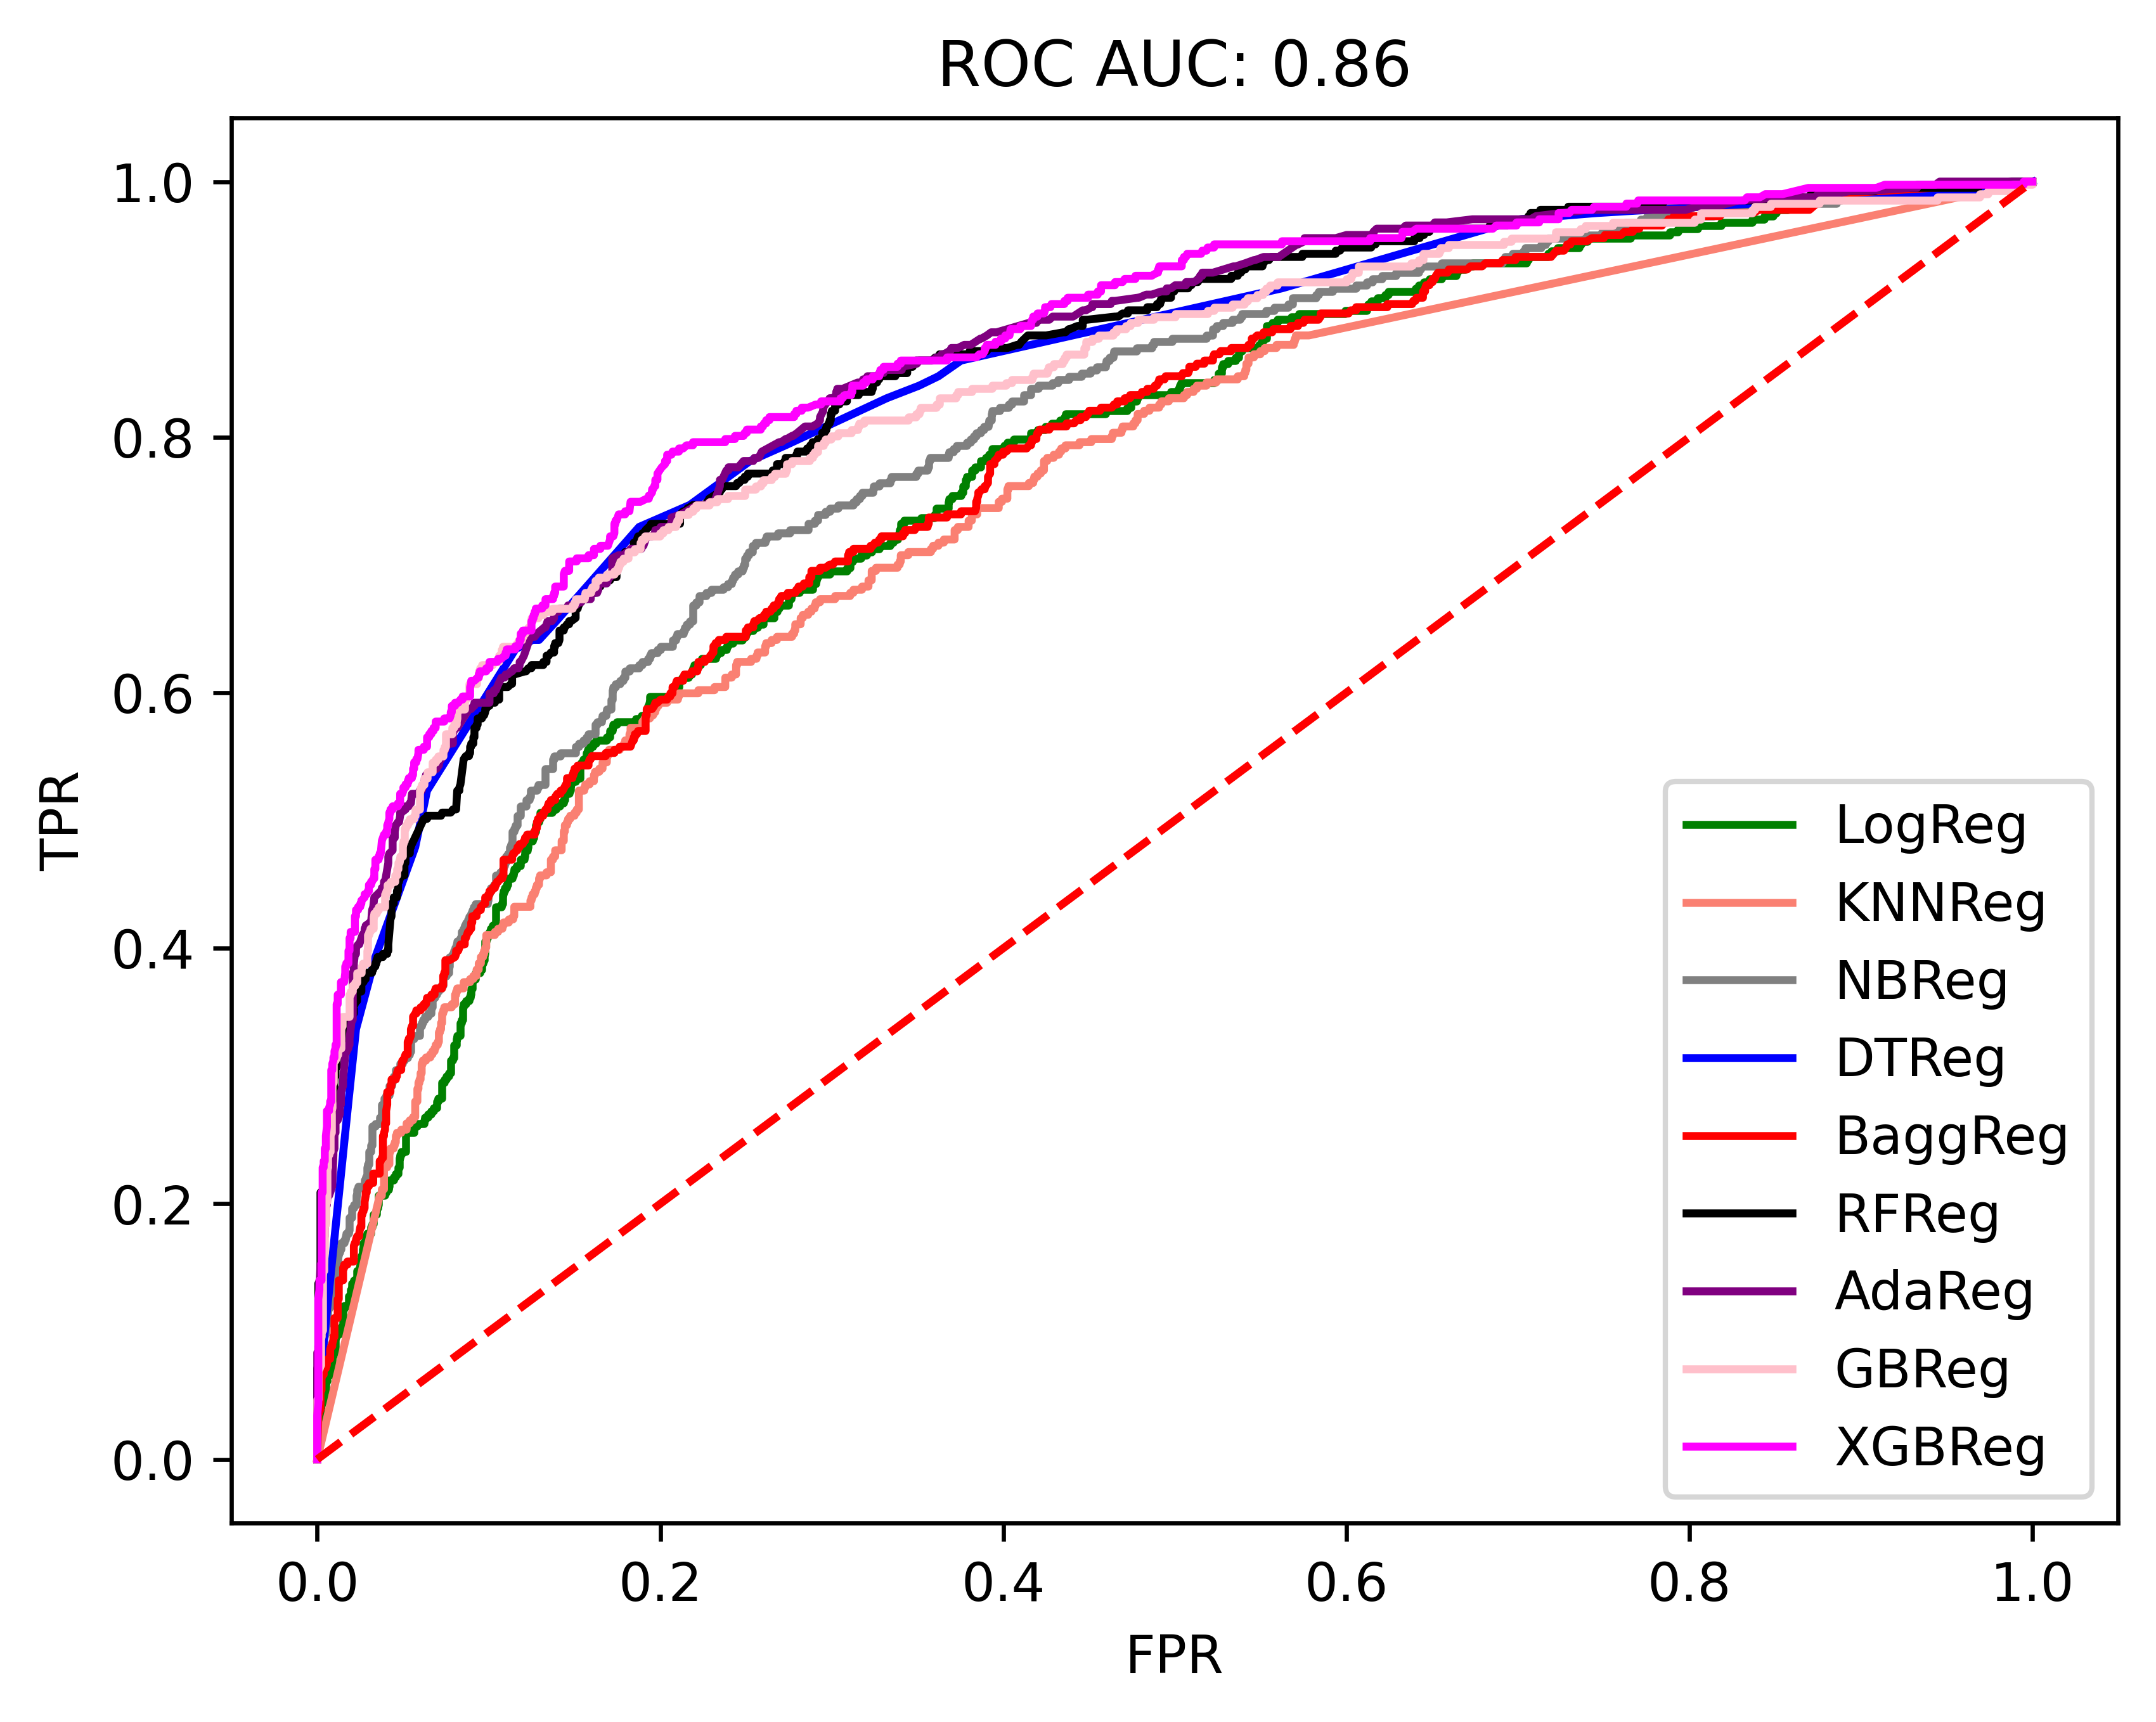

In [424]:
plt.figure(dpi=600)
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_preds_lr)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_preds_knn)
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, y_preds_nb)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_preds_dt)
fpr_bagg, tpr_bagg, thres_bagg = roc_curve(y_test, y_preds_bagg)
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, y_preds_rf)
fpr_ada, tpr_ada, thres_ada = roc_curve(y_test, y_preds_ada)
fpr_gb, tpr_gb, thres_gb = roc_curve(y_test, y_preds_gb)
fpr_xgb, tpr_xgb, thres_xgb = roc_curve(y_test, y_preds_xgb)
plt.plot(fpr_lr,tpr_lr,color='green', label='LogReg')
plt.plot(fpr_knn,tpr_knn,color='salmon', label='KNNReg')
plt.plot(fpr_nb,tpr_nb,color='grey', label='NBReg')
plt.plot(fpr_dt,tpr_dt,color='blue', label='DTReg')
plt.plot(fpr_bagg,tpr_bagg,color='red', label='BaggReg')
plt.plot(fpr_rf,tpr_rf,color='Black', label='RFReg')
plt.plot(fpr_ada,tpr_ada,color='Purple', label='AdaReg')
plt.plot(fpr_gb,tpr_gb,color='Pink', label='GBReg')
plt.plot(fpr_xgb,tpr_xgb,color='Magenta', label='XGBReg')
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_xgb),2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [416]:
print(roc_auc_score(y_test, y_preds_lr))
print(roc_auc_score(y_test, y_preds_knn))
print(roc_auc_score(y_test, y_preds_nb))
print(roc_auc_score(y_test, y_preds_rf))
print(roc_auc_score(y_test, y_preds_dt))
print(roc_auc_score(y_test, y_preds_ada))
print(roc_auc_score(y_test, y_preds_gb))
print(roc_auc_score(y_test, y_preds_xgb))

0.7672310214683096
0.750417597875225
0.79407759068776
0.8460054815987019
0.8410336376438071
0.8528513104784291
0.8371946677031422
0.8632700497107277


## Let's validate our model adn save it as a pickle file

In [429]:
final_model = model_xgb

In [437]:
print('TRAIN SCORE')
print(classification_report(y_train, final_model.predict(x_train)))

print('\n\n\nTEST SCORE')
print(classification_report(y_test, final_model.predict(x_test)))

TRAIN SCORE
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6370
           1       0.64      0.67      0.66      1630

    accuracy                           0.86      8000
   macro avg       0.78      0.79      0.78      8000
weighted avg       0.86      0.86      0.86      8000




TEST SCORE
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1593
           1       0.59      0.63      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [439]:
# Let's see the variance in roc_auc using k-fold 
score_xgb = cross_val_score(estimator=model_xgb,
               cv=KFold(n_splits=5,shuffle=True,random_state=2),scoring='roc_auc',
               verbose=1,X=x_train,y=y_train)

In [441]:
score_xgb

array([0.85958276, 0.87607722, 0.85522255, 0.85778149, 0.86975349])

In [443]:
print('CV of scores', (score_xgb.std()/score_xgb.mean())*100)

CV of scores 0.917082483995996


# It seems to be a generalized model. Hence, we can deploy it..

In [447]:
## Lets see if we can imporve recall of class 1 by changing cutoff classifier.

In [449]:
fpr,tpr,thres = roc_curve(y_test,y_preds_xgb)

In [461]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'THRESHOLD':thres,"Yoden's Index":tpr*(1-fpr)}).sort_values(by="Yoden's Index", ascending=False)

FPR       TPR  THRESHOLD  Yoden's Index
289  0.204018  0.786241   0.316032       0.625834
290  0.204645  0.786241   0.315363       0.625340
293  0.207156  0.788698   0.314102       0.625314
291  0.205901  0.786241   0.315306       0.624353
295  0.210923  0.791155   0.309529       0.624282
..        ...       ...        ...            ...
704  0.996861  1.000000   0.020987       0.003139
1    0.000000  0.002457   0.981206       0.002457
705  0.998117  1.000000   0.019158       0.001883
0    0.000000  0.000000        inf       0.000000
706  1.000000  1.000000   0.019080       0.000000

[707 rows x 4 columns]

In [463]:
y_predh_xgb_adj = (y_preds_xgb>0.316032).astype(int)

In [465]:
print(classification_report(y_test,y_predh_xgb_adj))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1593
           1       0.50      0.79      0.61       407

    accuracy                           0.79      2000
   macro avg       0.72      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000



In [467]:
import pickle


In [469]:
with open('final_model_xgb.pkl','wb') as file:
    pickle.dump(final_model,file)

In [471]:
x_test.to_csv('test_data.csv',index=False)
y_test.to_csv('test_actual.csv',index=False)